# Introduction:
To decide the "best" neighborhood in Pittsburgh we decided to look through three datasets all of which are very different and not really closely related at all.  We decided to incorporate a wider range of different types of data rather than choosing three datasets that are all closely related in type to try and appeal to a bigger audience.  The metric we have chosen is one that combines art projects, traffic counts, and number of arrests.  One alternative dataset we considered was one on COVID-19 data in each neighborhood, but the dataset applied to the entirety of Allegheny County and we just wanted to focus in on the city of Pittsburgh.

# The Metric:
As we stated before the metric is a combination of data on art projects, traffic counts, and number of arrests.  More specifcally, we focused on the number of public art projects in each neighborhood, and these included many types such as Modern and Contemporary Art, War Memorials, Historic Art, etc.  We weren't really concerned with the type of art projects in each neighborhood, but what we really wanted was to add up the number of all types of art projects in each neighborhood.  We also looked into a dataset that showed traffic counts in each neighborhood.  This particular dataset had a lot of data to look through such as speed limits, max speed, and even the average daily bike traffic.  The data we chose to focus on was the average daily car traffic for each neighborhood.  Since the dataset was recorded daily there were multiple entries for each neighborhood, so what we did was calculate the total number of traffic counts for each neighborhood by adding up all the entries for average daily car traffic for each perspective neighborhood.  The last dataset we focused on was the number of arrests in each neighborhood to determine which one could be deemed the safest.

# The Best Neighborhood:


Data Crunching:

In [71]:
import pandas as pd
import numpy as np

In [72]:
# Importing Art Dataset:
pgh_public_art = pd.read_csv("https://data.wprdc.org/datastore/dump/00d74e83-8a23-486e-841b-286e1332a151",
                           index_col="id", 
                           parse_dates=True)
# Importing Traffic Dataset:
pgh_traffic_count = pd.read_csv("https://data.wprdc.org/datastore/dump/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167",
                                index_col="id", 
                                parse_dates=True)
# Importing Arrests Dataset:
arrests = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")

In [74]:
#  Making a new dataframe from the art projects dataset to only get the specific data we want, neighborhood and art type. 
art = pgh_public_art[['neighborhood','art_type']]
#  Then counting the number of art projects in each neighborhood.
art_projects = art.groupby("neighborhood").count()

In [75]:
# Making a dataframe from the traffic count dataset to only get the specific data we want, neighborhood and average daily car traffic.
traffic = pgh_traffic_count[['neighborhood','average_daily_car_traffic']]
# Forming a dataframe that calculates the total number of traffic counts for each neighborhood by adding up all the entries
# for average daily car traffic for each perspective neighborhood.
traffic_total = traffic.groupby("neighborhood").sum()

In [76]:
# Forming a dataframe from the arrests dataset that gets the arrest times of each neighborhood.
relevantArrests = arrests[['INCIDENTNEIGHBORHOOD', 'ARRESTTIME']]
# Counting the total amount of times there was an arrest in each neighborhood.
amount_arrests = relevantArrests.groupby("INCIDENTNEIGHBORHOOD").count()

In [77]:
import pandas as pd
import geopandas
%matplotlib inline

In [78]:
# Importing a shapefile of the neighborhoods in Pittsburgh:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
# Combining the art and traffic datasets first:
combine_art_traffic = art_projects.merge(traffic_total, left_on='neighborhood', right_on='neighborhood')
# Combining the arrests dataset with the neighborhoods shapefile to combine only the neighborhoods we want to look at:
arrests = neighborhoods.merge(amount_arrests, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
# Combining all three metrics into one:
final_metric = combine_art_traffic.merge(arrests, left_on='neighborhood', right_on='hood')
final_metric[['hood','art_type','ARRESTTIME','average_daily_car_traffic']].head(50)

,hood,art_type,ARRESTTIME,average_daily_car_traffic
0,Allegheny Center,18,866.0,2386.0
1,Allegheny West,1,93.0,477.0
2,Beechview,5,913.0,4255.0
3,Beltzhoover,3,385.0,1577.0
4,Bloomfield,1,727.0,41920.0
5,Brighton Heights,5,818.0,7547.0
6,Brookline,2,932.0,14718.0
7,Carrick,3,1708.0,13787.0
8,Central Business District,27,2897.0,2305.0
9,Central Lawrenceville,2,336.0,10045.0


As seen above the art type column represents the number of public art projects in each neighborhood.  The arrest time column actually represents the amount of times there was an arrest in each neighborhood.  Lastly, the average daily car traffic column represents the total number of average daily traffic counts for each neighborhood.

In [79]:
# From that lets look at the top 20 neighborhoods with the least amount of arrests:
arrests_data = final_metric[['hood', 'ARRESTTIME']]
arrests_data.sort_values('ARRESTTIME',ascending=True).head(20)

,hood,ARRESTTIME
33,Regent Square,23.0
44,Swisshelm Park,30.0
27,Oakwood,57.0
1,Allegheny West,93.0
32,Polish Hill,117.0
12,Duquesne Heights,142.0
46,Upper Lawrenceville,151.0
42,Stanton Heights,172.0
38,Spring Garden,183.0
22,Lower Lawrenceville,192.0


In [80]:
# Lets do the same for the top 20 neighborhoods with the most public art projects:
art_data = final_metric[['hood', 'art_type']]
art_data.sort_values('art_type',ascending=False).head(20)

,hood,art_type
8,Central Business District,27
41,Squirrel Hill South,22
0,Allegheny Center,18
36,South Side Flats,10
19,Highland Park,10
26,North Shore,8
34,Shadyside,6
10,Central Oakland,5
2,Beechview,5
22,Lower Lawrenceville,5


In [81]:
# And lastly, for the top 20 neighborhoods with the least amount of traffic:
traffic_data = final_metric[['hood', 'average_daily_car_traffic']]
traffic_data.sort_values('average_daily_car_traffic',ascending=True).head(20)

,hood,average_daily_car_traffic
46,Upper Lawrenceville,0.0
44,Swisshelm Park,0.0
27,Oakwood,0.0
39,Spring Hill-City View,63.0
36,South Side Flats,115.0
21,Lincoln-Lemington-Belmar,195.0
1,Allegheny West,477.0
28,Overbrook,777.0
38,Spring Garden,1226.0
17,Greenfield,1553.0


We decided not to use the neighborhoods above with "0" car traffic due to inaccuracy.

# Visualizing The Number of Art Projects in Each Neighborhood:

<AxesSubplot:>

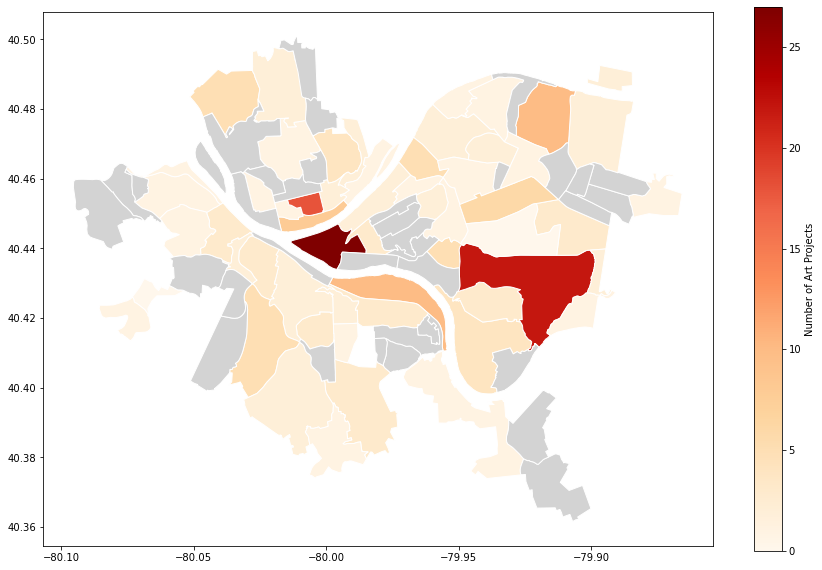

In [82]:
art_map = neighborhoods.merge(art_projects, how='left', left_on='hood', right_on='neighborhood')
art_map.plot(column='art_type', 
               cmap='OrRd',             
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Number of Art Projects"},
               figsize=(15, 10),        
               missing_kwds={"color": "lightgrey"}
               )

# Visualizing The Number of Traffic Counts in Each Neighborhood:

<AxesSubplot:>

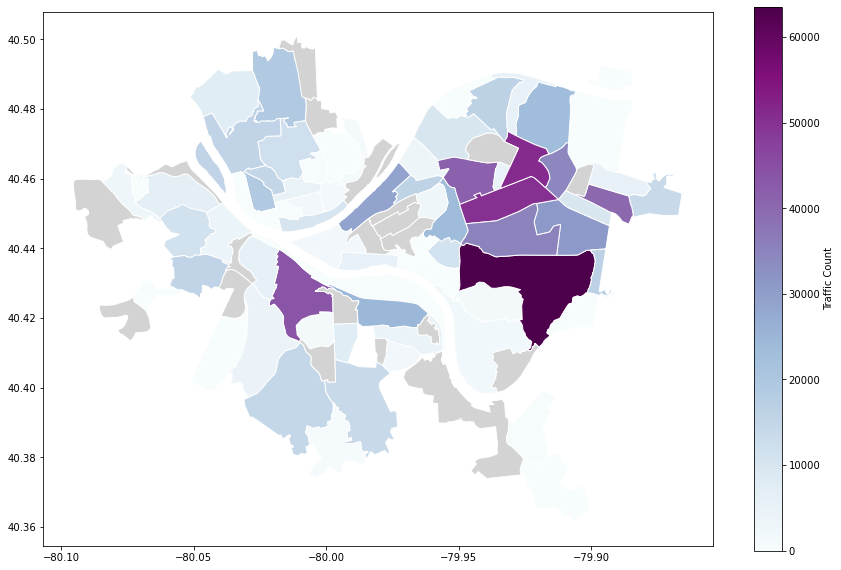

In [83]:
traffic_map = neighborhoods.merge(traffic_total, how='left', left_on='hood', right_on='neighborhood')
traffic_map.plot(column='average_daily_car_traffic', 
               cmap='BuPu',             
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Traffic Count"},
               figsize=(15, 10),        
               missing_kwds={"color": "lightgrey"}
               )

# Visualizing The Number of Arrests in Each Neighborhood:

<AxesSubplot:>

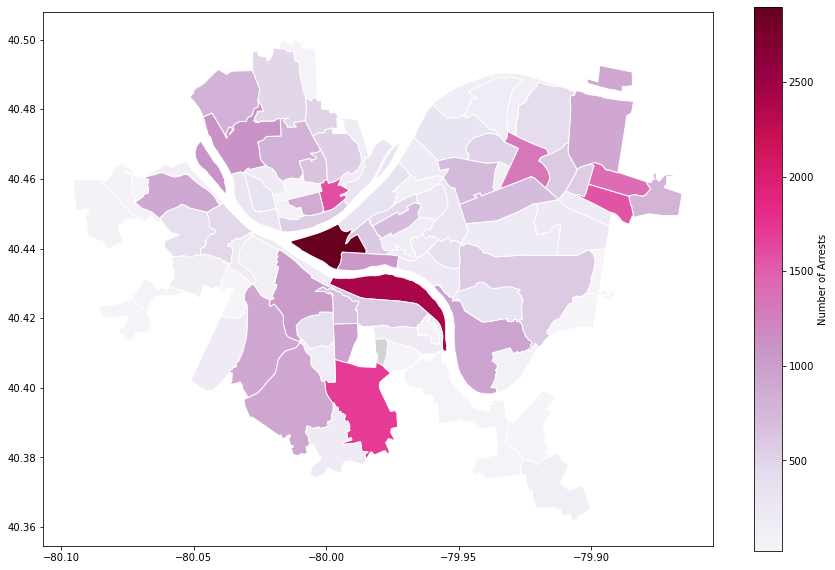

In [84]:
arrests_map = neighborhoods.merge(amount_arrests, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
arrests_map.plot(column='ARRESTTIME', 
               cmap='PuRd',             
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Number of Arrests"},
               figsize=(15, 10),        
               missing_kwds={"color": "lightgrey"}
               )

After working through all the data it was hard to determine a winner.  Some of the neighborhoods with the most art projects would have high traffic or a high amount of arrests and vice versa.  Due to this we decided to try and find a happy medium out of the neighborhoods in our final metric, and concluded that Lower Lawrencville is the "best" neighborhood in Pittsburgh.  Lower Lawrenceville ranked 10th out of the neighborhoods with the least amount of arrests, it tied for the 6th spot out of the neighborhoods with the most art projects, and finally it ranked 14th in the neighborhoods with the least amount of traffic.

# Conclusion:
Based on a data driven project we concluded that Lower Lawrenceville is the best neighborhood in Pittsburgh.  Lower Lawrenceville is a smaller neighborhood in Pittsburgh that offers residents a good urban/suburban mix environment.  There's plenty of shops, restaurants, bars, and parks.  Overall, Lower Lawrencville has lower crime rates than a lot of other areas in the city, has a good amount of art/cultural attractions to visit, and does pretty good in terms of traffic compared to other neighborhoods.  In conclusion, Lower Lawrenceville seems like it would be a perfect place for families and younger adults to live, and is easily one of the best and in our opinion based on our data the best neighborhood in Pittsburgh.